In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

c:\programdata\anaconda3\envs\deepclass\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\deepclass\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\deepclass\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\deepclass\lib\site-packages\ten

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden1 = 256
n_hidden2 = 128
noise_level = 0.6

In [3]:
# Encoder 2

# X_noisy = tf.placeholder(tf.float32, [None, n_input])
# Y = tf.placeholder(tf.float32,[None,n_input])

# W_encode1 = tf.Variable(tf.random_uniform([n_input,n_hidden1],-1.,1.))
# b_encode1 = tf.Variable(tf.random_uniform([n_hidden1],-1.,1.))

# encoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy,W_encode1), b_encode1))

# W_encode2 = tf.Variable(tf.random_uniform([n_hidden1,n_hidden2],-1.,1.))
# b_encode2 = tf.Variable(tf.random_uniform([n_hidden2],-1.,1.))

# encoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h1,W_encode2), b_encode2))

# W_decode1 = tf.Variable(tf.random_uniform([n_hidden2,n_hidden1],-1.,1.))
# b_decode1 = tf.Variable(tf.random_uniform([n_hidden1],-1.,1.))

# decoder_h2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder_h2,W_decode1),b_decode1))

# W_decode2 = tf.Variable(tf.random_uniform([n_hidden1,n_input],-1.,1.))
# b_decode2 = tf.Variable(tf.random_uniform([n_input],-1.,1.))

# decoder_h1 = tf.nn.sigmoid(tf.add(tf.matmul(decoder_h2,W_decode2),b_decode2))

# cost = tf.reduce_mean(tf.square(Y-decoder_h1))
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [4]:
keep_prob = tf.placeholder(tf.float32)

X_noisy = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32,[None,n_input])

W_encode = tf.Variable(tf.random_uniform([n_input,n_hidden1],-1.,1.))
b_encode = tf.Variable(tf.random_uniform([n_hidden1],-1.,1.))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy,W_encode), b_encode))

#dropout
encoder = tf.nn.dropout(encoder,keep_prob)

W_decode = tf.Variable(tf.random_uniform([n_hidden1,n_input],-1.,1.))
b_decode = tf.Variable(tf.random_uniform([n_input],-1.,1.))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

cost = tf.reduce_mean(tf.square(Y-decoder))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch: 1 cost: 0.070103216
Epoch: 2 cost: 0.036991941
Epoch: 3 cost: 0.030808057
Epoch: 4 cost: 0.028660585
Epoch: 5 cost: 0.027503402
Epoch: 6 cost: 0.026750316
Epoch: 7 cost: 0.026226924
Epoch: 8 cost: 0.025818815
Epoch: 9 cost: 0.025483701
Epoch: 10 cost: 0.025307784
Epoch: 11 cost: 0.025077849
Epoch: 12 cost: 0.024965495
Epoch: 13 cost: 0.024848582
Epoch: 14 cost: 0.024727312
Epoch: 15 cost: 0.024616924
Epoch: 16 cost: 0.024559812
Epoch: 17 cost: 0.024482574
Epoch: 18 cost: 0.024421971
Epoch: 19 cost: 0.024345921
Epoch: 20 cost: 0.024282977


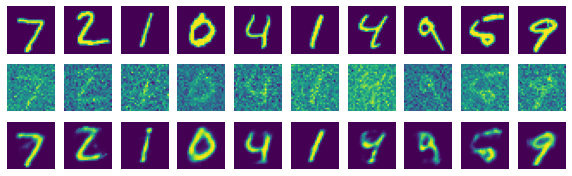

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for epoch in range(epoch_num):
        avg_cost = 0
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            batch_x_noisy = batch_xs + noise_level * np.random.normal(loc=0.0,scale= 1.0, size = batch_xs.shape)
            _,cost_val = sess.run([optimizer,cost],feed_dict = {X_noisy:batch_x_noisy, Y: batch_xs, keep_prob:0.75})
            avg_cost += cost_val / total_batch
        print('Epoch:', '%d' %(epoch+1),'cost:','{:.9f}'.format(avg_cost))

    test_X = mnist.test.images[:10]+noise_level*np.random.normal(loc=0.0,scale=1.0, size = mnist.test.images[:10].shape)
    
    samples = sess.run(decoder, feed_dict = {X_noisy:test_X, keep_prob : 1})
    fig, ax = plt.subplots(3,10,figsize=(10,3))
    
    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[2][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        ax[1][i].imshow(np.reshape(test_X[i],(28,28)))
        ax[2][i].imshow(np.reshape(samples[i],(28,28)))
    plt.show()
        